## Análise de Perfil de Cliente
### Entendimento do Negócio
O marketing de um banco realizou uma campanha de 3 meses em todo o Brasil para vender um produto de investimento, selecionando clientes específicos. Após a campanha, a área de Analytics recebeu a base de dados para analisar o perfil dos clientes. **O objetivo é identificar o público mais propenso a comprar títulos e investimentos** (a informação sobre a compra está na coluna 'Cliente_Comprou_o_Titulo?'), para direcionar futuras campanhas.

Sua tarefa como Analista de Dados é realizar uma análise exploratória sobre aspectos como idade, profissão, estado civil, formação, crédito, e uso de hipoteca e empréstimo, e gerar um relatório com insights claros e traduzidos para a linguagem de negócios.

### Dicionário de Colunas

### Colunas numéricas (int64):

- Saldo_Conta_Corrente: Saldo atual do cliente na conta corrente.

- Qte_de_Ligações_Feitas: Número de ligações feitas para o cliente durante a campanha.

- Idade: Idade do cliente.

### Colunas categóricas (object):
- Cliente_Comprou_o_Titulo?: Indica se o cliente comprou o produto de investimento (Sim/Não).

- Profissão: Profissão do cliente (e.g., Operário, Administrador, Aposentado).

- Estado_Civil: Estado civil do cliente (e.g., Solteiro, Casado).

- Formação: Nível de escolaridade do cliente (e.g., Ensino Médio, Ensino Superior).

- Cliente_Devedor?: Indica se o cliente tem uma dívida registrada (Sim/Não).

- Tem_Hipoteca?: Indica se o cliente possui uma hipoteca (Sim/Não).

- Tem_Emprestimo?: Indica se o cliente possui um empréstimo (Sim/Não)..


# Importando a Base e as Bibliotecas

In [892]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [893]:
base = pd.read_csv('bank_marketing.csv', header=1)

### Entendimento dos Dados
Nesta primeira etapa do CRISP-DM, é importante entender os dados disponíveis para o projeto. Isso envolve conhecer as informações, verificar se estão corretas e identificar padrões iniciais. Esse processo ajuda a preparar os dados para as próximas fases da análise.

In [894]:
# Verificando o tamanho da base de dados
base.shape

(9684, 11)

Temos 9684 linhas (clientes) e 10 colunas

In [895]:
# Verificando a base de dados
base.head()

,Unnamed: 0,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,NaN,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1


**OBS**: Percebemos a existência de uma coluna com dados faltantes que necessita de um tratamento. Vamos conferir se esse padrão se extende para todas as linhas na etapa de 'Tratamento'.

Agora vamos verificar alguns dados estatísticos das colunas numéricas.

In [896]:
# Verificando informações da base final
base.describe()

,Unnamed: 0,Idade,Saldo_Conta_Corrente,Qte_de_Ligações_Feitas
count,0.0,9684.000000,9684.000000,9684.000000
mean,NaN,41.235130,1706.046881,2.463445
std,NaN,12.110432,2749.931890,2.630583
min,NaN,18.000000,1.000000,1.000000
25%,NaN,32.000000,258.000000,1.000000
50%,NaN,38.000000,728.000000,2.000000
75%,NaN,49.000000,2007.000000,3.000000
max,NaN,95.000000,29340.000000,63.000000


### Preparação dos Dados (Tratamento)
Na etapa de Preparação dos Dados do CRISP-DM, os dados são organizados e tratados para garantir que estejam prontos para análise. Isso inclui limpar dados incorretos ou faltantes, transformar informações em formatos adequados, e selecionar as variáveis mais importantes para o projeto.

In [897]:
# Verificando dados nulos
base.isnull().sum()

Unnamed: 0                   9684
Cliente_Comprou_o_Titulo?       0
Idade                           0
Profissão                       0
Estado_Civil                    0
Formação                        0
Cliente_Devedor?                0
Saldo_Conta_Corrente            0
Tem_Hipoteca?                   0
Tem_Emprestimo?                 0
Qte_de_Ligações_Feitas          0
dtype: int64

**OBS**: Verificamos que todas as linhas dessa coluna possuem valores faltantes. Então, vamos optar por excluir essa coluna.

In [898]:
# Excluindo a primeira coluna (índice 0)
base = base.drop(base.columns[0], axis=1)

In [899]:
# Verificando informações da base final e conferindo a exclusão da coluna 'Unnamed'
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cliente_Comprou_o_Titulo?  9684 non-null   object
 1   Idade                      9684 non-null   int64 
 2   Profissão                  9684 non-null   object
 3   Estado_Civil               9684 non-null   object
 4   Formação                   9684 non-null   object
 5   Cliente_Devedor?           9684 non-null   object
 6   Saldo_Conta_Corrente       9684 non-null   int64 
 7   Tem_Hipoteca?              9684 non-null   object
 8   Tem_Emprestimo?            9684 non-null   object
 9   Qte_de_Ligações_Feitas     9684 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 756.7+ KB


É visível que existem colunas que não são numéricas e para uma análise mais facil e clara, é necessário converter as variaveis categóricas em numéricas. Existem algumas colunas como, profissão, estado civil e formação não serão covertidas, elas serão análisadas mais para frente. E as que são possíveis serão mudadas para 0, representando não e 1, representando sim.

In [900]:
# Converter colunas categóricas de Sim/Não para 0/1
base['Cliente_Comprou_o_Titulo?'] = base['Cliente_Comprou_o_Titulo?'].map({'Sim': 1, 'Não': 0})
base['Cliente_Devedor?'] = base['Cliente_Devedor?'].map({'Sim': 1, 'Não': 0})
base['Tem_Hipoteca?'] = base['Tem_Hipoteca?'].map({'Sim': 1, 'Não': 0})
base['Tem_Emprestimo?'] = base['Tem_Emprestimo?'].map({'Sim': 1, 'Não': 0})

Agora vamos checar se essas colunas foram devidamente covertidas.

In [901]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cliente_Comprou_o_Titulo?  9684 non-null   int64 
 1   Idade                      9684 non-null   int64 
 2   Profissão                  9684 non-null   object
 3   Estado_Civil               9684 non-null   object
 4   Formação                   9684 non-null   object
 5   Cliente_Devedor?           9684 non-null   int64 
 6   Saldo_Conta_Corrente       9684 non-null   int64 
 7   Tem_Hipoteca?              9684 non-null   int64 
 8   Tem_Emprestimo?            9684 non-null   int64 
 9   Qte_de_Ligações_Feitas     9684 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 756.7+ KB


Nota-se que as colunas foram devidamente convertidas e agora podemos começar com uma análise mais fácil e certeira.

para isso será feita a correlação entre as colunas numéricas, para tentar perceber mais claramente quais colunas se correlacionam.

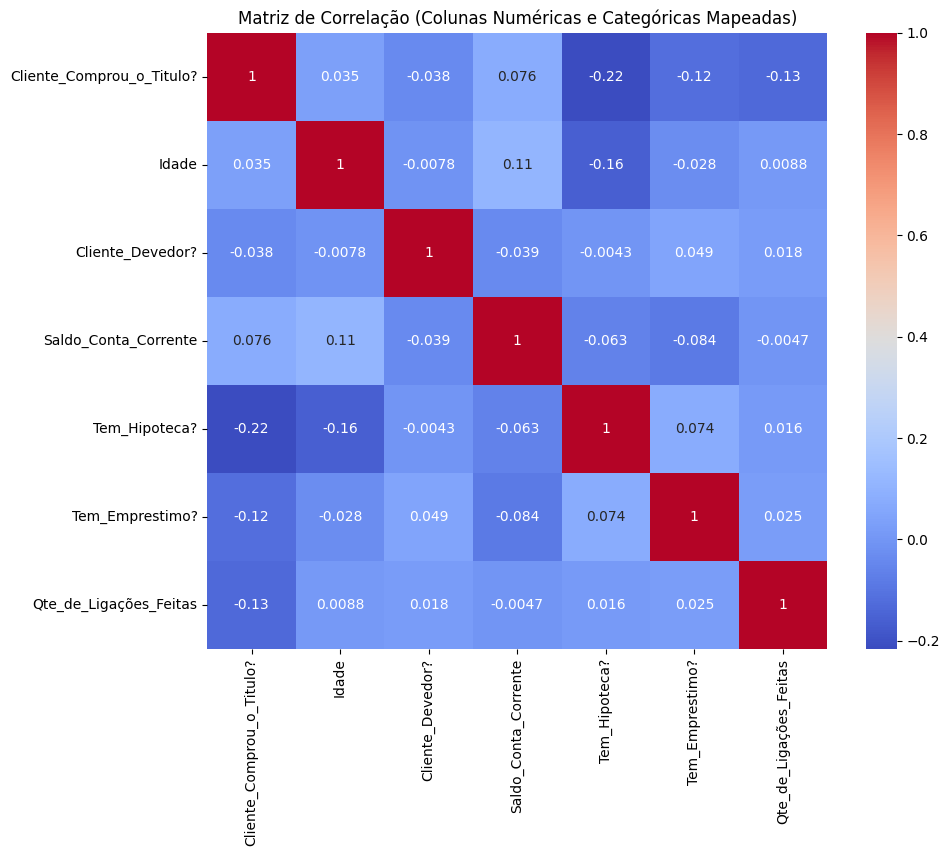

In [902]:
# Selecionar todas as colunas numéricas (incluindo as que foram mapeadas)
colunas_numericas = base.select_dtypes(include=['int64', 'float64']).columns

# Gerar a matriz de correlação para as colunas numéricas
correlation_matrix = base[colunas_numericas].corr()

# Plotar o heatmap para visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Colunas Numéricas e Categóricas Mapeadas)')
plt.show()

### Insights Sobre a Correlação das Variáveis Numéricas.
O foco deste mapa de correlação é com a coluna 'Cliente_Comprou_o_Titulo?', pois ela indica se o cliente comprou o titulo do banco ou não, sendo uma variável crucial para entender os padrões do cliente. Ao analisar as correlações com essa coluna, podemos identificar quais variáveis possuem maior influência sobre o padrão de compra dos clientes.

Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis, indicando pouca ou nenhuma relação linear entre elas. Por outro lado, quanto mais distante de 0 (em direção a -1 ou 1), mais forte é a correlação, com -1 indicando uma correlação negativa perfeita e 1 indicando uma correlação positiva perfeita. Os valores variam de -1 a 1.

Nota-se que, embora não existam correlações fortes entre as variáveis numéricas, é essencial realizar uma investigação mais aprofundada dessas variáveis, pois elas ainda podem revelar insights valiosos para o Banco.

### 1 - Fatores Relevantes
Vamos analisar as principais correlações identificadas na base de dados para extrair insights relevantes sobre o comportamento dos clientes. Para isso, a base será segmentada em duas categorias: clientes que realizaram a compra do título e clientes que não realizaram. Essa divisão permitirá a criação de gráficos comparativos, facilitando a visualização e compreensão das variáveis mais impactantes que podem ter influenciado a decisão de compra. Esses gráficos serão essenciais para identificar padrões e tendências que ajudaram a determinar o perfil dos clientes que optaram por investir nos produtos da instituição.

In [903]:
cliente_comprou = base[base['Cliente_Comprou_o_Titulo?'] == 1]
cliente_nao_comprou = base[base['Cliente_Comprou_o_Titulo?'] == 0]

In [904]:
# Verificação da base 'cliente_comprou'.
cliente_comprou.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
2,1,83,Aposentado,Casado,Fundamental,0,425,0,0,1
3,1,32,Administrador,Solteiro,Ensino Superior,0,10281,0,0,1
4,1,31,Administrador,Solteiro,Ensino Médio,0,360,1,0,1
5,1,66,Aposentado,Casado,Fundamental,0,2883,0,0,1
6,1,34,Técnico,Casado,Ensino Médio,0,294,1,0,3


In [905]:
# Verificação da base 'cliente_nao_comprou'.
cliente_nao_comprou.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,0,33,Operário,Casado,Ensino Médio,0,263,1,0,3
1,0,58,Aposentado,Casado,Ensino Médio,0,19,0,1,3
7,0,35,Operário,Casado,Ensino Médio,0,74,0,0,2
8,0,55,Administrador,Casado,Ensino Superior,0,1161,1,0,6
11,0,56,Administrador,Casado,Ensino Superior,0,746,0,0,1


Bases foram devidamente divididas.

Agora serão gerados alguns gráficos para tentar achar alguma correlação e definir quais os pontos que serão trabalhados nessa análise.

C:\Users\victor\AppData\Local\Temp\ipykernel_7524\337849204.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_comprou['Idade'], label='Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7524\337849204.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_nao_comprou['Idade'], label='Não Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7524\337849204.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_comprou['Saldo_Conta_Corrente'], label='Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_7524\337849204.py:16: FutureWarning: 

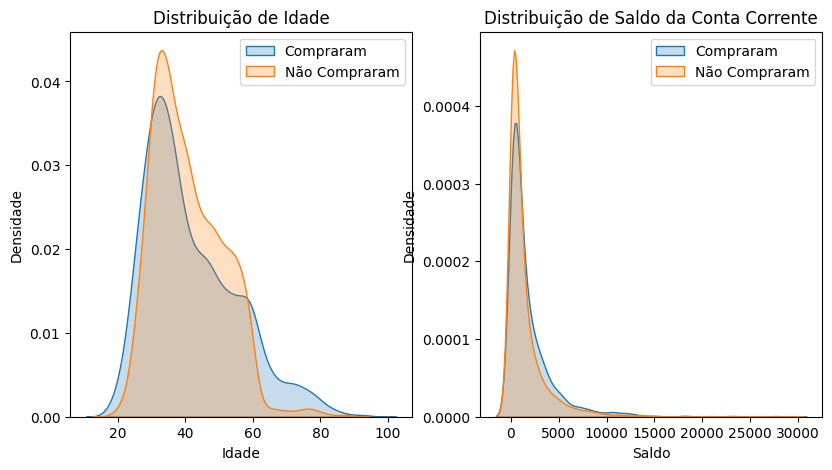

In [906]:

# Comparar a densidade de variáveis numéricas entre os dois grupos
plt.figure(figsize=(15, 5))

# Densidade de Idade
plt.subplot(1, 3, 1)
sns.kdeplot(data=cliente_comprou['Idade'], label='Compraram', shade=True)
sns.kdeplot(data=cliente_nao_comprou['Idade'], label='Não Compraram', shade=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()

# Densidade de Saldo
plt.subplot(1, 3, 2)
sns.kdeplot(data=cliente_comprou['Saldo_Conta_Corrente'], label='Compraram', shade=True)
sns.kdeplot(data=cliente_nao_comprou['Saldo_Conta_Corrente'], label='Não Compraram', shade=True)
plt.title('Distribuição de Saldo da Conta Corrente')
plt.xlabel('Saldo')
plt.ylabel('Densidade')
plt.legend()



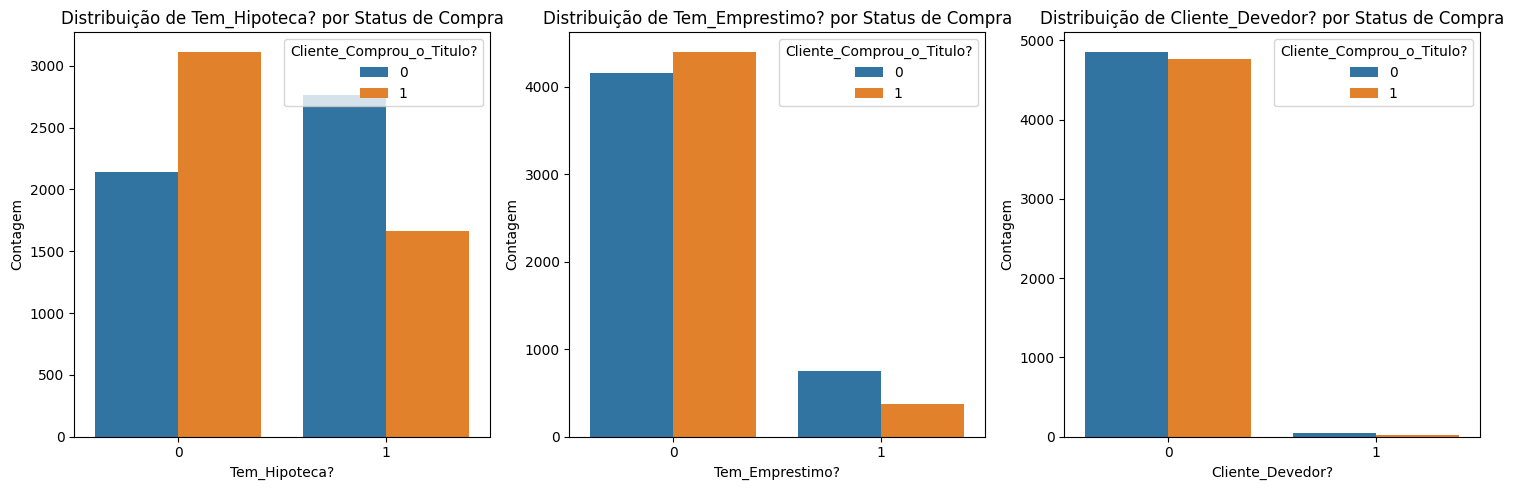

In [907]:
# Definindo as variáveis categóricas para comparar
variaveis_numericas = ['Tem_Hipoteca?', 'Tem_Emprestimo?', 'Cliente_Devedor?'] 

# Criar um gráfico de barras para cada variável categórica
plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis_numericas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=var, hue='Cliente_Comprou_o_Titulo?', data=base)
    plt.title(f'Distribuição de {var} por Status de Compra')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


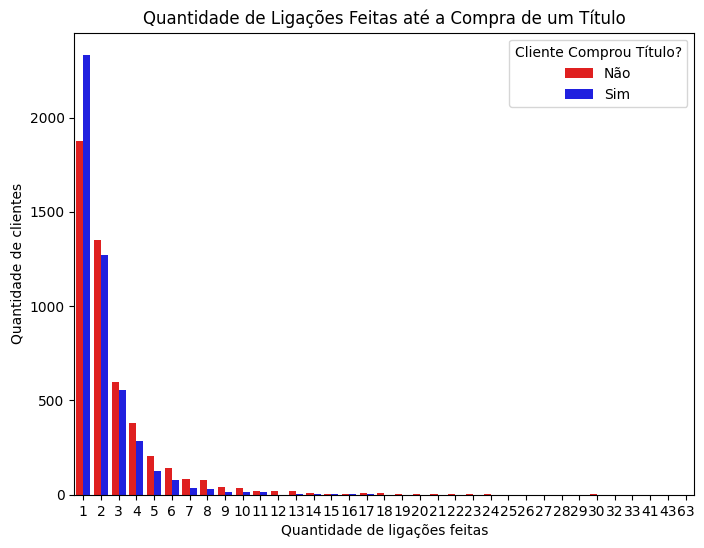

In [908]:
# Para finalizar, a última coluna numérica.
plt.figure(figsize=(8, 6))
sns.countplot(x="Qte_de_Ligações_Feitas", hue="Cliente_Comprou_o_Titulo?", data=base, palette={1: "blue", 0: "red"})
plt.title('Quantidade de Ligações Feitas até a Compra de um Título')
plt.xlabel("Quantidade de ligações feitas")
plt.ylabel("Quantidade de clientes")
plt.legend(title='Cliente Comprou Título?', labels=['Não', 'Sim'])
plt.show()


O que vai e não vai ser trabalhado.

idades




a


tem hipoteca




a





a

### 2- Análise de Compras com Base na Idade dos Clientes

Nesta seção, vamos examinar as faixas etárias que apresentam maior incidência de compra de títulos de investimento e também a incidência de clientes que não compram, buscando insights valiosos a partir dessas informações. A análise das faixas etárias nos permitirá entender melhor quais grupos estão mais propensos a adquirir produtos financeiros e quais segmentos demonstram menor interesse, permitindo uma melhor segmentação das futuras campanhas.

Compreender essas dinâmicas é fundamental para o desenvolvimento de estratégias de marketing mais eficazes e direcionadas. Além disso, identificaremos oportunidades para personalizar ofertas e serviços, aumentando a satisfação do cliente e, consequentemente, impulsionando as vendas de produtos de investimento.

Mas antes disso, vamos analisar os clientes que o banco tem por faixa etária.


In [909]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(base['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada

Idade
Abaixo de 18       8
18-24            253
25-34           3194
35-40           1953
41-45           1113
46-50            996
51-55            842
56-60            753
61-65            200
66+              372
Name: count, dtype: int64

Insight: É possível notar uma concentração significativa de clientes nas faixas etárias de 25-40 anos, que representam um total de 5147 clientes. Esse grupo é, sem dúvida, um público-alvo estratégico para o banco, indicando que ele está investindo esforços significativos para atrair e reter clientes nesse intervalo.

Isso sugere que estratégias de marketing e produtos financeiros podem ser especialmente moldados para atender a este segmento, como ofertas de títulos de investimento que se alinhem às necessidades e expectativas dessa faixa etária.

Após essa análise torna-se necessário analisar as faixas etárias dos clientes que compram os títulos do banco.

In [910]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(cliente_comprou['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada



Idade
Abaixo de 18       7
18-24            189
25-34           1612
35-40            877
41-45            463
46-50            437
51-55            352
56-60            370
61-65            172
66+              299
Name: count, dtype: int64

Insight: Observa-se uma maior concentração de clientes que compram títulos de investimentos na faixa etária de 25-34 anos. Essa faixa etária demonstra um potencial elevado de interesse em produtos financeiros, o que pode ser atribuído a fatores como a busca por estabilidade financeira, planejamento para o futuro e a aquisição de ativos.

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

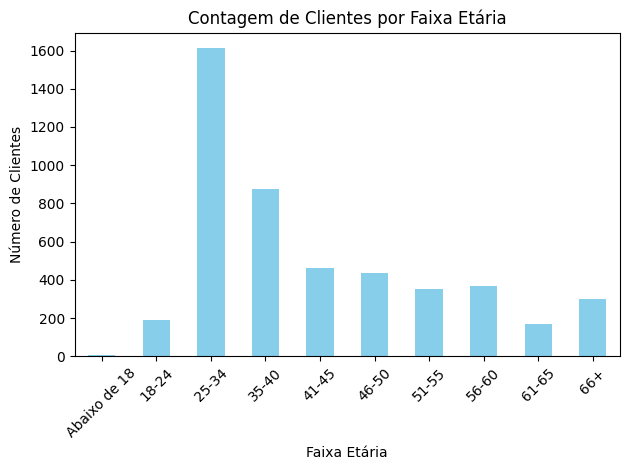

In [911]:
# Criando gráfico de barras
contagem_faixa_etaria_detalhada.plot(kind='bar', color='skyblue')
# Adicionando título e rótulos
plt.title('Contagem de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')

# Exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar layout
plt.show()

Insight: A partir da faixa etária de 34 anos, observa-se uma queda gradual no número de clientes que compram títulos de investimento. Essa tendência pode indicar que o banco não está direcionando suas estratégias de marketing e produtos de forma eficaz para atrair clientes mais velhos. 


colocar isso aqui na conclusão

Essa lacuna pode representar uma oportunidade significativa para o banco desenvolver produtos e serviços que atendam às necessidades específicas de clientes mais maduros, aumentando assim a retenção e a satisfação do cliente. Personalizar ofertas, como investimentos de longo prazo e planos de aposentadoria, pode não apenas reverter essa tendência de queda, mas também aumentar a lealdade desses clientes, resultando em um crescimento sustentável no número de clientes ativos.

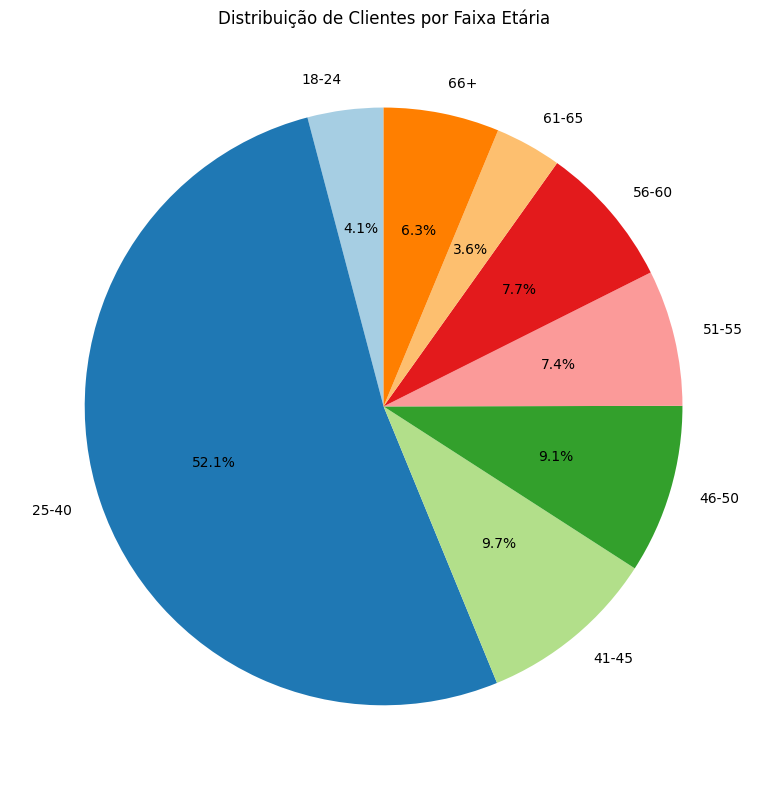

In [912]:
# Plotando Gráfico de Pizza para Distribuição de Clientes por Faixa Etária.

# Dados das faixas etárias e suas contagens
faixas_etarias = ['18-24', '25-40','41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixas = [196, 2489, 463, 437, 352, 370, 172, 299]  # Contagem de clientes por faixa etária

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()

Insight: A soma das faixas etárias de 24 a 40 anos corresponde a 52,1% de todas as compras. Isso destaca essa faixa etária como um grupo-chave que representa uma parte significativa da base de clientes do banco. Essa predominância sugere que estratégias de marketing e produtos devem ser direcionadas para atender às necessidades e preferências desse segmento.

Agora que os clientes que compram os títulos foram analisados por faixa etária, é importante investigar também quais faixas etárias apresentam maior número de clientes que não compram. Esse estudo permitirá entender melhor os padrões de comportamento de compra entre os diferentes grupos etários, revelando quais segmentos não estão engajados com a aquisição de títulos.

In [913]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(cliente_nao_comprou['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada

Idade
Abaixo de 18       1
18-24             64
25-34           1582
35-40           1076
41-45            650
46-50            559
51-55            490
56-60            383
61-65             28
66+               73
Name: count, dtype: int64

Predomínio da Faixa Etária Jovem: A faixa etária de 25-34 anos apresenta um número significativo de clientes que não compraram títulos (1582), indicando que essa é uma faixa com alto potencial de conversão.

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

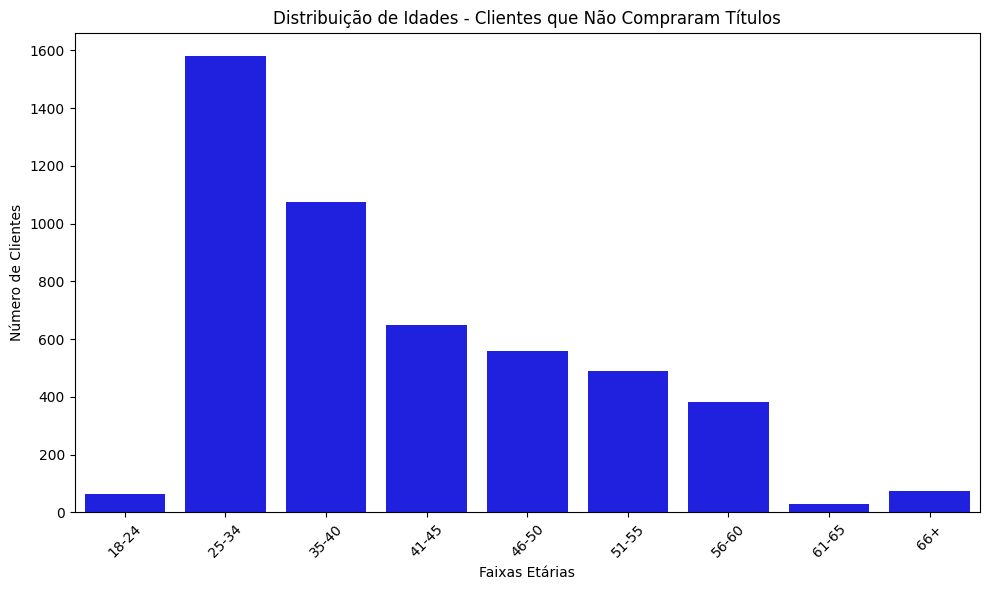

In [914]:
# Dados das contagens de faixas etárias
faixas_etarias = ['18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixa_etaria = [65, 1582, 1076, 650, 559, 490, 383, 28, 73]

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=faixas_etarias, y=contagem_faixa_etaria, color='b')


# Personalizar o gráfico
plt.title('Distribuição de Idades - Clientes que Não Compraram Títulos')
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


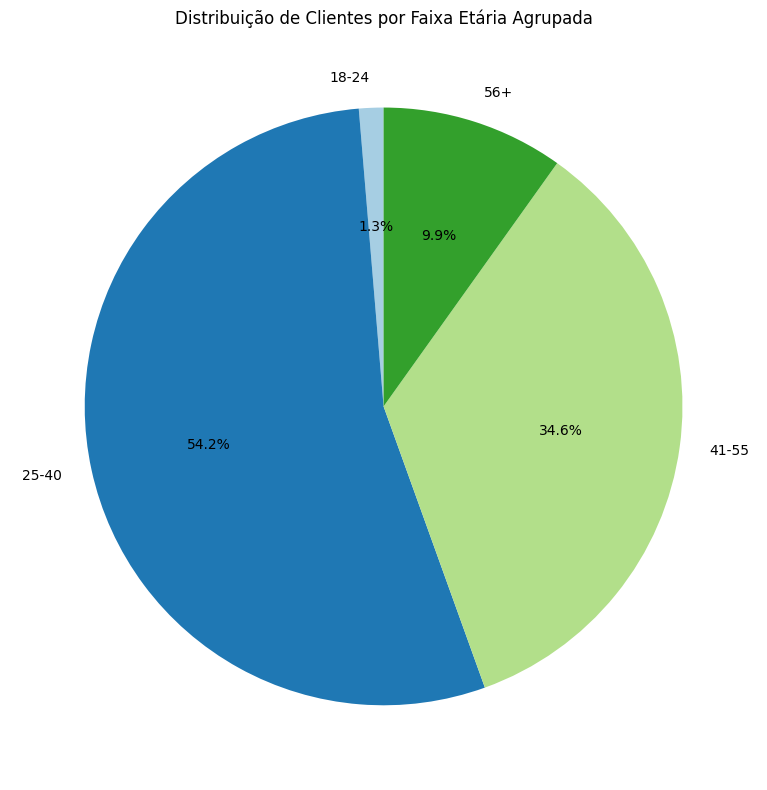

In [915]:
import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
faixas_etarias = ['18-24', '25-40', '41-55', '56+']
contagem_faixas = [
    1 + 64,              # Abaixo de 18 e 18-24
    1582 + 1076,        # 25-40
    650 + 559 + 490,    # 41-55
    383 + 28 + 73       # 56+
] 

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária Agrupada')

# Exibir gráfico
plt.tight_layout()
plt.show()




Insight: Os gráficos reforçam visualmente o quanto o banco é popular entre os clientes da faixa etária de 25-40 anos. Mesmo entre os clientes que não compram títulos, a maior parte está concentrada nessa faixa etária. Essa informação sugere que o banco já possui uma forte presença nesse segmento, mas também indica uma oportunidade para desenvolver estratégias que incentivem esses clientes a realizarem compras.

Portanto, uma abordagem proativa para engajar esses clientes, como campanhas de marketing direcionadas ou ofertas personalizadas, pode resultar em um aumento significativo nas vendas de títulos de investimento.

### Conclusão
- A análise revelou que a faixa etária do público-alvo do banco está predominantemente entre 25 e 40 anos. Isso é um indicativo claro de que as estratégias de marketing e comunicação da instituição estão bem alinhadas com os interesses dessa faixa etária.

- Além disso, a análise também mostrou que, enquanto os clientes que compram títulos estão concentrados nessa mesma faixa etária, os clientes que não realizam compras também se encontram predominantemente entre 25 e 40 anos. Essa sobreposição sugere que, apesar do potencial de compra, há uma resistência ou falta de interesse que merece ser investigada.

- Embora o número de compras diminua com o aumento da idade, existe uma oportunidade significativa para explorar estratégias voltadas para faixas etárias mais velhas. Esses grupos podem estar abertos a ofertas específicas que abordem suas necessidades e preocupações financeiras.

- Portanto, é fundamental investigar os motivos pelos quais os clientes da faixa etária alvo não estão comprando títulos. Compreender esses fatores pode ajudar a desenvolver abordagens personalizadas que incentivem a aquisição de produtos financeiros e, consequentemente, aumentem a satisfação do cliente e a rentabilidade do banco.

### 3- Análise de Compras com Base se o Cliente Possui ou Não Hipotéca

Nesta seção, vamos investigar como a presença ou ausência de uma hipoteca influencia a decisão de compra de títulos de investimento pelos clientes. A análise considerará as diferenças de comportamento entre aqueles que possuem uma hipoteca e aqueles que não possuem, buscando identificar padrões e tendências que possam informar estratégias de marketing mais eficazes.

Entender essa dinâmica é crucial para segmentar o público e desenvolver ofertas direcionadas, maximizando as oportunidades de vendas. Além disso, essa análise pode revelar se a hipoteca é um fator limitante para a aquisição de produtos financeiros, permitindo ao banco criar campanhas que abordem as preocupações e necessidades específicas de cada grupo.

In [916]:

# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(index=base['Tem_Hipoteca?'], columns=base['Cliente_Comprou_o_Titulo?'], 
                                   rownames=['Possui Hipoteca'], colnames=['Comprou Título'])

# Adicionar total de cada linha e coluna
tabela_contingencia.loc['Total'] = tabela_contingencia.sum()
tabela_contingencia['Total'] = tabela_contingencia.sum(axis=1)

# Exibir a tabela
tabela_contingencia


Comprou Título,0,1,Total
Possui Hipoteca,,,
0,2144,3116,5260
1,2762,1662,4424
Total,4906,4778,9684


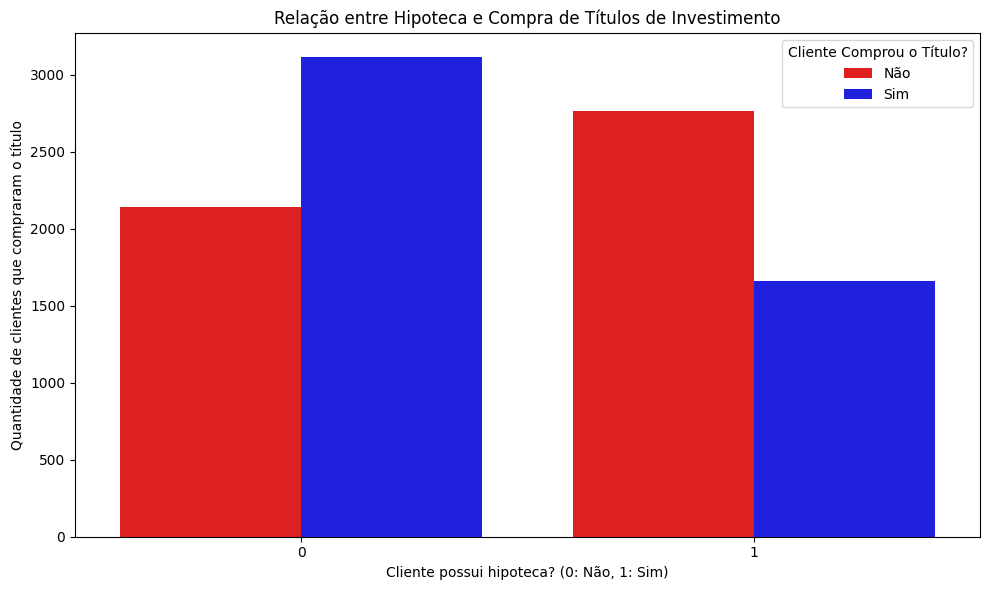

In [917]:

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))

# Atualizando a paleta conforme os valores únicos encontrados
palette = {1: "blue", 0: "red"}  # 1 corresponde a "Sim" e 0 a "Não" na nossa legenda
sns.countplot(data=base, x="Tem_Hipoteca?", hue="Cliente_Comprou_o_Titulo?", palette=palette)

# Título e rótulos
plt.title("Relação entre Hipoteca e Compra de Títulos de Investimento")
plt.xlabel("Cliente possui hipoteca? (0: Não, 1: Sim)")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.legend(title='Cliente Comprou o Título?', loc='upper right', labels=["Não", "Sim"])
plt.tight_layout()

# Exibir gráfico
plt.show()




Insight: Observa-se que clientes sem hipoteca apresentam uma probabilidade significativamente maior de realizar compras, tanto em termos absolutos quanto em porcentagem em relação àqueles que possuem hipoteca. Portanto, é recomendável direcionar campanhas de marketing especificamente para esse segmento de clientes sem hipoteca, a fim de maximizar as oportunidades de vendas e engajamento.

### Conclusão

- A maior parte dos clientes (3116) que compram títulos não possui hipoteca, sugerindo que a ausência de hipoteca pode estar relacionada a um maior interesse em adquirir produtos financeiros, como títulos de investimento. Isso pode indicar que clientes sem dívidas maiores estão mais dispostos a investir.
Maior Número de Clientes sem Compra de Títulos:

- Observa-se que 2144 clientes sem hipoteca não compraram títulos, o que representa um número considerável. Essa informação pode sugerir que, mesmo entre os clientes sem dívidas, ainda há uma barreira ou falta de interesse na compra de títulos. Isso pode indicar a necessidade de ações de marketing e educação financeira focadas nesse público.
Clientes com Hipoteca Mostram Interesse em Comprar Títulos:

- Apesar de terem hipoteca, 1662 clientes ainda compraram títulos. Isso pode sugerir que esses clientes estão buscando diversificação de seus investimentos, mesmo enquanto gerenciam uma dívida. Esta situação apresenta uma oportunidade para o banco desenvolver produtos financeiros que atendam especificamente às necessidades de clientes que possuem hipoteca.
Diferenciação de Comportamento entre Grupos:

- A análise mostra que o comportamento de compra é diferente entre clientes que possuem hipoteca e aqueles que não possuem. É possível que fatores como segurança financeira, percepção de risco e conhecimento sobre investimentos influenciem essa decisão. O banco pode investigar quais características estão mais presentes entre os compradores de títulos, especialmente no grupo com hipoteca.
Oportunidade de Marketing e Educação:

- Com 4906 clientes não comprando títulos (total de 5260 sem hipoteca e 4424 com hipoteca), há uma grande oportunidade para o banco investir em estratégias de marketing e educação financeira. Programas que expliquem os benefícios dos títulos de investimento e ofereçam consultoria personalizada podem ser eficazes para converter esses clientes.
Necessidade de Segmentação Estratégica:

- As diferenças nas taxas de compra entre os dois grupos indicam a importância de uma segmentação mais refinada nas estratégias de marketing. Campanhas direcionadas que considerem a situação financeira e o perfil de risco de cada cliente podem ajudar a aumentar a taxa de conversão de clientes que não compram títulos.

Após a análise das variáveis numéricas, torna-se necessária a exploração das viriáveis caategóricas como, formação, Estado_Civil e Profissão.

Começando por formação acadêmica, vamos explorar para ver se conseguimos notar algum padrao...

In [918]:
# Agrupar os dados por formação e se o cliente comprou o título
agrupamento_formacao = base.groupby(['Formação', 'Cliente_Comprou_o_Titulo?']).size().unstack(fill_value=0)

# Adicionar uma coluna de total de compras
agrupamento_formacao['Total'] = agrupamento_formacao.sum(axis=1)

# Adicionar uma coluna para a porcentagem de compra
agrupamento_formacao['Porcentagem de Compra (%)'] = (agrupamento_formacao[1] / agrupamento_formacao['Total']) * 100

# Exibir o resultado
print(agrupamento_formacao)


Cliente_Comprou_o_Titulo?     0     1  Total  Porcentagem de Compra (%)
Formação                                                               
Desconhecido                209   243    452                  53.761062
Ensino Médio               2531  2187   4718                  46.354387
Ensino Superior            1430  1817   3247                  55.959347
Fundamental                 736   531   1267                  41.910024


Insight: A análise mostra que a formação acadêmica dos clientes tem um impacto significativo na probabilidade de compra de títulos. Clientes com Ensino Superior apresentam a maior porcentagem de compra, sugerindo que a educação superior pode estar associada a uma maior disposição ou capacidade financeira para adquirir títulos.

Vamos explorar graficamente esse ponto, utilizando um gráfico de barras para visualizar a porcentagem de compra de títulos conforme a formação dos clientes.

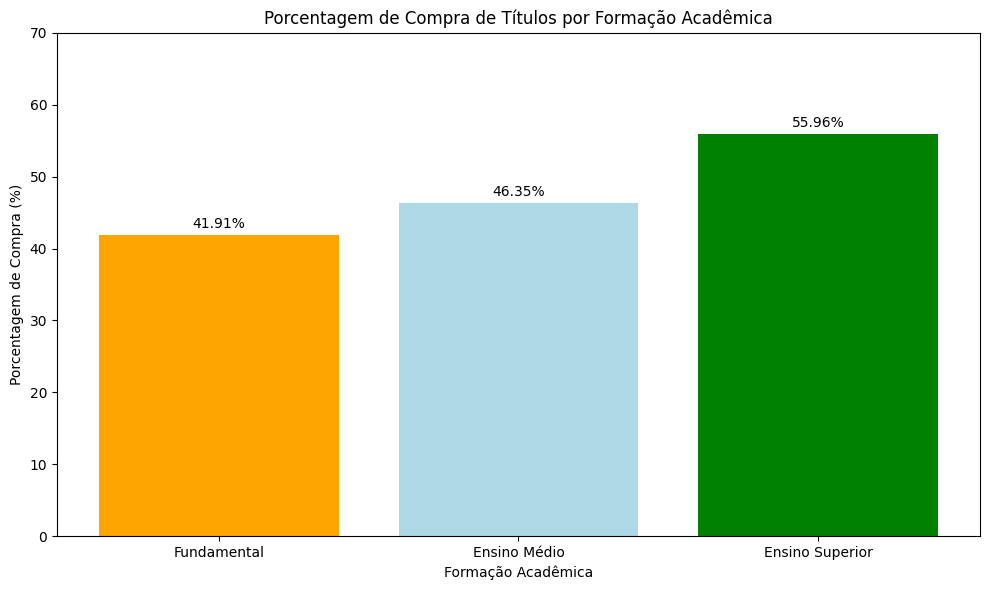

In [919]:
# Foi tirado os desconhecidos, pois não ajuda em nada na nossa análise.
# Dados
dados = {
    'Formação': ['Fundamental','Ensino Médio', 'Ensino Superior'],
    'Porcentagem de Compra (%)': [41.91, 46.35, 55.96,]
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Formação'], df['Porcentagem de Compra (%)'], color=['orange', 'lightblue', 'green', 'red'])

# Adicionar título e rótulos
plt.title('Porcentagem de Compra de Títulos por Formação Acadêmica')
plt.xlabel('Formação Acadêmica')
plt.ylabel('Porcentagem de Compra (%)')

# Exibir valores nas barras
for i in range(len(df)):
    plt.text(i, df['Porcentagem de Compra (%)'][i] + 1, f"{df['Porcentagem de Compra (%)'][i]:.2f}%", ha='center')

# Ajustar layout e exibir gráfico
plt.ylim(0, 70)  # Ajusta o limite do eixo y para melhor visualização
plt.tight_layout()
plt.show()


Insight: O gráfico de barras reforça graficamente o ponto dito acima, por isso é importante que para os clientes com Ensino Médio e Fundamental, pode ser valioso implementar programas de educação financeira que expliquem os benefícios da aquisição de títulos. Isso pode aumentar a taxa de conversão e encorajar mais pessoas a investirem.

In [920]:
porcentagem = base.groupby('Estado_Civil')['Cliente_Comprou_o_Titulo?'].agg(['count', 'sum'])
porcentagem['Porcentagem de Saída'] = round((porcentagem['sum'] / porcentagem['count']) * 100, 3)
porcentagem

,count,sum,Porcentagem de Saída
Estado_Civil,,,
Casado,5469,2491,45.548
Divorciado,1056,528,50.000
Solteiro,3159,1759,55.682


Insight: Concentração de Clientes Casados: A maior parte dos clientes é casada, com um total de 5.469 clientes nessa categoria. No entanto, a taxa de compra entre eles é de 45,55%, o que é inferior à taxa de compra dos solteiros.

Porcentagem de Compra Abaixo de 50%: Apesar da grande quantidade de clientes casados, a taxa de compra abaixo de 50% sugere que este grupo pode não estar tão engajado ou convencido a adquirir títulos. Isso pode indicar uma oportunidade de marketing ou estratégias de venda específicas para aumentar a taxa de conversão nesse segmento.

Solteiros com Alta Taxa de Compra: Por outro lado, os solteiros apresentam uma taxa de compra de 55,68%, superior à dos casados e dos divorciados (50,00%). Isso sugere que os solteiros podem estar mais inclinados a investir em títulos, representando um público potencial a ser explorado mais profundamente pela empresa.

In [921]:
agrupamento_profissao = base.groupby(['Profissão', 'Cliente_Comprou_o_Titulo?']).size().unstack(fill_value=0)

# Adicionando uma coluna de Total
agrupamento_profissao['Total'] = agrupamento_profissao.sum(axis=1)

# Calculando a porcentagem de compra
agrupamento_profissao['Porcentagem de Compra (%)'] = (agrupamento_profissao[1] / agrupamento_profissao['Total']) * 100

# Exibindo o resultado
agrupamento_profissao

Cliente_Comprou_o_Titulo?,0,1,Total,Porcentagem de Compra (%)
Profissão,,,,
Administrador,1629,1773,3402,52.116402
Aposentado,227,479,706,67.847025
Autônomo,187,168,355,47.323944
Desconhecido,33,30,63,47.619048
Desempregado,130,187,317,58.990536
Diarista,141,99,240,41.250000
Empresário,175,98,273,35.897436
Estudante,86,258,344,75.000000
Operário,1003,618,1621,38.124614
